# CS 315 Project Data Exploration

## Marisa Papagelis and Natalie Reid

In this notebook, we will explore data for our project. At the most basic level, we are scraping Facebook pages for post content (text, likes, and comments). Additional information will be added to this section as our project progresses.

We will compliment this notebook with Collecting_Data_CS315_Project_MarisaPapagelis_NatalieReid, a notebook for our data collection. All data we explore will be pulled from that notebook.

# Section A: Getting to Know the Data 

In Section A, we will subset collect a subset of our data and run various data exploration and data summarizing representations on it. The main goal of this section is to prepare for the final data exploaration and analysis by figuring out how much data we need and how we would like to analyze it. 

## Part I: Sample Exploration: Measuring Frequency of Keywords

For our data exploration, we randomly selected 175 Facebook posts from each news source page in our data set (300 posts total). We read through the text in these posts and recorded how many posts our chosen keywords appeared in to get an idea of whether or not our data collection methods and keywords were feasible.

To do this, we are going to create dictionaries of our keywords for each page, and we will loop through the post texts of our 175 posts for each page recording the number of posts each keyword appears in. This will help us determine whether whether or not our data collection methods and keywords were feasible. 

In [1]:
import json
import os

First, we load our collected data for all three news sources and assign appropriate names to each JSON file.

**In order to replicate our process on a personal computer, the file path for *all* JSON loads may need to be altered. For easiest access, move the 'PM6_MarisaPapagelis_NatalieReid' folder, containing all of our work, to your desktop, and the given file paths should work**

In [2]:
os. getcwd() 
#current working directory should say '/Users/**your user**/Desktop/PM6_Marisa_Papagelis_NatalieReid/Python Notebooks'

'/Users/marisapapagelis/Desktop/PM6_MarisaPapagelis_NatalieReid/Python Notebooks'

In [3]:
os.chdir('../') #back out of 'Python Notebooks' folder

In [4]:
with open ('JSON files/reuters-posts.json','r') as infile:
    reuters = json.load(infile) 

In [5]:
with open ('JSON files/MSNBC-posts.json','r') as infile:
    MSNBC = json.load(infile)

In [6]:
with open ('JSON files/FoxNews-posts.json','r') as infile:
    foxNews = json.load(infile)

Next, we subset our data to the first 175 posts on each news source page for our sample exploration. 

In [7]:
reuters = reuters[0:174]
MSNBC = MSNBC[0:174]
foxNews = foxNews[0:174]

In order to iterate through the 175 posts on each news source Facebook page, we will use dictionaries. Below, we will create a dictionary for each news page. We will set all of the values to 0 to begin.

In [8]:
reutersDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0}
MSNBCDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0}
foxNewsDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0}

In order to collect data, for each news source page we will loop through the text of each post for the predetermined keywords using the dictionaries to keep count. The hasNoText function checks to see if a given post has no text in the body, which gets stored in our dictionary as 'NaN'. The post!=post notation returns true if it has no text, false if otherwise. This function is then incorporated into the countKeywords function because we only want to examine a post for keywords if it actually contains any text. If not, we skip that post and move on to the next one.

In [9]:
# remove any posts that do not have text
def hasNoText(post):
    return post != post

# count the frequency of keywords from a site's dictionary of posts
def countKeywords(site, siteDict):
    for post in site:
        for key in siteDict:
            if hasNoText(post[0]) == False:
                if key in post[0].lower():
                    siteDict[key] += 1

Now we run our countKeywords function for each news page we previously scraped. Posts without any text are ignored, in order to avoid errors with the .lower() function. This is a great example of the 'language processing'/'text cleaning' portion of our project. 

In [10]:
countKeywords(reuters, reutersDict)
countKeywords(MSNBC, MSNBCDict)
countKeywords(foxNews, foxNewsDict)

Finally, we record results from our dictionaries. An example dictionary result for Reuters is printed below. 

In [11]:
print(reutersDict)
print(MSNBCDict)
print(foxNewsDict)

{'economy': 6, 'healthcare': 0, 'supreme court': 3, 'coronavirus': 32, 'crime': 0, 'foreign policy': 0, 'guns': 0, 'race': 5, 'immigration': 0, 'inequality': 0, 'climate change': 1, 'abortion': 0}
{'economy': 1, 'healthcare': 0, 'supreme court': 9, 'coronavirus': 32, 'crime': 0, 'foreign policy': 0, 'guns': 0, 'race': 5, 'immigration': 0, 'inequality': 0, 'climate change': 0, 'abortion': 0}
{'economy': 1, 'healthcare': 0, 'supreme court': 11, 'coronavirus': 67, 'crime': 0, 'foreign policy': 0, 'guns': 0, 'race': 1, 'immigration': 0, 'inequality': 0, 'climate change': 0, 'abortion': 0}


Concluding this sample exploration, we think it would be helpful to add more keywords to our dictionary. We will continue our exploration with this in the next part. 

## Part II: Follow Up Sample Exploration: Adding Relevant Keywords

After reviewing our initial data exploration, we also decided to add five more keywords that we saw in the headlines often: “police”, “government”, “covid”, “president”, and “congress.” We wanted to add these so that our search reflects as many relevant issues as possible. 

We have to remember to set our original dictionaries back to zero before running the code on them again. 

In [12]:
reutersDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0}
MSNBCDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0}
foxNewsDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0}

Below, we our new keywords to each dictionary. We also set them to 0.

In [13]:
reutersDict['police'] = 0
reutersDict['government'] = 0
reutersDict['covid'] = 0
reutersDict['president'] = 0
reutersDict['congress'] = 0

MSNBCDict['police'] = 0
MSNBCDict['government'] = 0
MSNBCDict['covid'] = 0
MSNBCDict['president'] = 0
MSNBCDict['congress'] = 0

foxNewsDict['police'] = 0
foxNewsDict['government'] = 0
foxNewsDict['covid'] = 0
foxNewsDict['president'] = 0
foxNewsDict['congress'] = 0

Now, we are going to rerun our code on the updated dictionaries to count the new keywords. 

In [14]:
countKeywords(reuters, reutersDict)
countKeywords(MSNBC, MSNBCDict)
countKeywords(foxNews, foxNewsDict)

Finally, we record results from our dictionaries. An example dictionary result for Reuters is printed below. 

In [15]:
print(reutersDict)
print(MSNBCDict)
print(foxNewsDict)

{'economy': 6, 'healthcare': 0, 'supreme court': 3, 'coronavirus': 32, 'crime': 0, 'foreign policy': 0, 'guns': 0, 'race': 5, 'immigration': 0, 'inequality': 0, 'climate change': 1, 'abortion': 0, 'police': 3, 'government': 11, 'covid': 43, 'president': 30, 'congress': 1}
{'economy': 1, 'healthcare': 0, 'supreme court': 9, 'coronavirus': 32, 'crime': 0, 'foreign policy': 0, 'guns': 0, 'race': 5, 'immigration': 0, 'inequality': 0, 'climate change': 0, 'abortion': 0, 'police': 0, 'government': 0, 'covid': 30, 'president': 84, 'congress': 1}
{'economy': 1, 'healthcare': 0, 'supreme court': 11, 'coronavirus': 67, 'crime': 0, 'foreign policy': 0, 'guns': 0, 'race': 1, 'immigration': 0, 'inequality': 0, 'climate change': 0, 'abortion': 0, 'police': 5, 'government': 2, 'covid': 46, 'president': 119, 'congress': 1}


Concluding our keyword frequency exploration, we decided it would be ideal to have 800 posts per news source in our final sample (2400 total). This would ensure that we have enough data to achieve meaningful results and conclusions. In our final sample, we will perform some data analysis techniques on this frequency data. 

## Part III:  Applying a Data Analysis Technique on our Sample

In this section, we will apply a data analysis technique that we encountered during our Literature Review. We will use this application to evaluate whether or not this data analysis technique would be feasible to use on our final sample.

A paper that resonated with us during our Literature Review was titled “Social Media News Communities: Gatekeeping, Coverage, and Statement Bias” published by Diego Saez-Trumper, Carlos Castillo, and Mounia Lalmas. These researchers collected a preselected list of news websites chosen from Alexa’s top 100 websites. Over a two week period, they checked each source every 30 minutes for new articles. Next, they aggregated the articles into stories which discussed a common topic or event by measuring the cosine similarity of pairs of articles using TF.IDF weighting.

We chose apply this technique by calculating the TF-IDF scores using the NLTK libary and the .TextCollection() API which provides TF, IDF, and TF-IDF abstractions for us to use. We merged this idea with a technique we looked at from Professor Eni Mustafaraj's notebook titled "Day 11 - Mining Text Files-checkpoint" that we explored during lecture. We used our predetermined keywords to query text data using TF-IDF. This provides for us a score and a ranking of each of the text posts based on certain keywords. We experimented with different keywords as well as various combinations of keywords. 

In [16]:
import nltk

We will create a function QueryTextData that takes in a string of keyword(s) as query terms and parses through the terms within the text of each post, ranking each post in order of its similarity to the keyword(s). Finally, the function prints out the resulting texts and scores in a ranked order. The function is designed so the ranking only includes posts in which the text contained at least one of the keyword(s).

In [17]:
def QueryTextData(keywords):
    
    data = reuters # data from reuters Facebook page
    
    activities = [] # create an empty list 
    for post in reuters: # iterate through data and pull out post text
        activity = post[0].lower().split() # split words within posts into lists
        activities.append(activity) # append each list to empty list 
            
    tc = nltk.TextCollection(activities) # TextCollection provides tf, idf, and tf_idf abstractions
    
    relevant_activities = [] # create a new list for relevant posts (posts containing keywords)

    for idx in range(len(activities)):
        score = 0
        for term in [t.lower() for t in keywords]:
            score += tc.tf_idf(term, activities[idx]) # iterate through terms in each post and calculate score
        if score > 0: # only add to relevant list if score > 0 (keyword is in post)
            relevant_activities.append({'score': score, 'title': data[idx][0]})
    
    # sort by score and display results
    relevant_activities = sorted(relevant_activities,
                             key=lambda p: p['score'], reverse=True)
    
    for activity in relevant_activities:
        print('Title: {0}'.format(activity['title']))
        print('Score: {0}'.format(activity['score']))
        print()

As the final piece of our data analysis technique, we will test our function on some randomly selected keywords and combinations of keywords in order to see relevance and rankings.

The functions were commented out to save space, but they can be uncommented to view results. 

In [73]:
#QueryTextData('coronavirus')

In [75]:
#QueryTextData('race')

In [77]:
#QueryTextData('climate change')

Concluding our exploration, we decided that ranking our keywords does not provide as much insight as we hoped it would. We will take concept from our exploration to use with our final sample, but we will not use the ranking format as we had hoped to. 

## Part IV: Building and Testing a Classifier on our Sample

In this section we will create a classification system that can predict whether a given text post comes from either the Reuters (center/moderate), MSNBC (left-wing), or Fox News (right-wing) Facebook page. The code for this section was based off of the Day 14 Sentiment Analysis notebook, specifically section 2. We start by creating our test and training data sets, which are subsets of the text posts we scraped from the three facebook pages. Both of these data sets are large arrays of tuples, where the tuple first contains the text post as a string, and then another string with the name of the news page where it originated.

In [18]:
# create two empty lists to hold the training and testing data
train = []
test = []

# subset the scraped reuters data and add it to the correct list
reutersTrain = reuters[0:149]
reutersTest = reuters[150:174]

for post in reutersTrain:
    train.append((post[0], "Reuters"))
    
for post in reutersTest:
    test.append((post[0], "Reuters"))

# subset the scraped MSNBC data and add it to the correct list
msnbcTrain = MSNBC[0:149]
msnbcTest = MSNBC[150:174]

for post in msnbcTrain:
    train.append((post[0], "MSNBC"))

for post in msnbcTest:
    test.append((post[0], "MSNBC"))
    
# subset the scraped Fox News data and add it to the correct list
foxNewsTrain = foxNews[0:149]
foxNewsTest = foxNews[150:174]

for post in foxNewsTrain:
    train.append((post[0], "Fox News"))
    
for post in foxNewsTest:    
    test.append((post[0], "Fox News"))

The training and testing data sets can be viewed in their entirety by uncommenting and running the cells below.

In [80]:
#print(test)

In [81]:
#print(train)

Next, we import the Naive Bayes Classifier module, which will help us to train our classifier and use it for testing.

In [19]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

In [20]:
cl.accuracy(test)

0.8055555555555556

As seen above, our initial accuracy rating is 80.5%, indicating that our machine can predict the source of a given Facebook news text post correctly 80.5% of the time. Below is the entire output of running our testing data set through the classifier, and it includes the predicted and actual sources next to the corresponding text post. As we can see, the classifier frequently chooses the correct source.

*We commented the section below for simplicity because it is quite lengthy. Uncomment the cell to view the results including the prediciton, the truth, and the sentence.*

In [85]:
# print("Predict | True | Sentence")
# for sentence in test:
#     print(cl.classify(sentence[0]) + " | "  + sentence[1] + " | " + sentence[0])

We were satisfied with how this classifier functioned, as well as the accuracy, so we decided to move forward with using it as our model in our final data analysis. 

# Section B: Final Data Analysis

In Section B, we have our final data set which consists of 1000 posts from each news source we are observing (Reuters, MSNBC, and Fox News). Since the news is always changing, to ensure time as a control, to the best of our ability, **all data was scraped from Reuters, MSNBC, and FoxNews Facebook pages on October 6, 2020 between 11am and 3pm EDT.** 

Our final dataset will consist of 2400 posts (800 from each of Reuters, MSNBC, and FoxNews). We will evaluate keyword frequency by news source, evaluate average post length by news source, and perform quantitative and qualitative analysis on the results, then we will test and train a classifier on our dataset. Our classifier will be able to predict whether a post is from a right-wing, left-wing, or neutral news source. We will test our classifier on additional news sources and track the accuracy of our model. 

## Part I: Measuring Keyword Frequency

### Collecting Keyword Frequency

In Part I of our final data analysis, we will measure the keyword frequency of our predetermined keywords in our final data set. We will use dictionaries as well as the same process that we used in our sample exploration to do this. Refer back to Section A for in depth documentation. 

First, we load our collected data for all three news sources and assign appropriate names to each JSON file. 

**In order to replicate our process on a personal computer, the file path for *all* JSON loads may need to be altered. For easiest access, move the 'PM6_MarisaPapagelis_NatalieReid' folder, containing all of our work, to your desktop, and the given file paths should work**

In [21]:
with open ('JSON files/reuters-posts.json','r') as infile:
    reuters = json.load(infile)

In [22]:
with open ('JSON files/MSNBC-posts.json','r') as infile:
    MSNBC = json.load(infile)

In [23]:
with open ('JSON files/FoxNews-posts.json','r') as infile:
    foxNews = json.load(infile)

We subset our data to choose the first 800 posts from each news source to use in our dataset. 

In [7]:
reuters = reuters[0:799]
MSNBC = MSNBC[0:799]
foxNews = foxNews[0:799]

Next, we create dictionaries with all of our predetermined keywords. Each keyword is set to 0 to prepare for counting. 

In [25]:
reutersDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}
MSNBCDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}
foxNewsDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}

In order to collect data, for each news source page we will loop through the text of each post for the predetermined keywords using the dictionaries to keep count. The hasNoText function checks to see if a given post has no text in the body, which gets stored in our dictionary as 'NaN'. The post!=post notation returns true if it has no text, false if otherwise. This function is then incorporated into the countKeywords function because we only want to examine a post for keywords if it actually contains any text. If not, we skip that post and move on to the next one.

In [26]:
# remove any posts that do not have text
def hasNoText(post):
    return post != post

# count the frequency of keywords from a site's dictionary of posts
def countKeywords(site, siteDict):
    for post in site:
        for key in siteDict:
            if hasNoText(post[0]) == False:
                if key in post[0].lower():
                    siteDict[key] += 1

Run the countKeywords function on our three news sources. 

In [27]:
countKeywords(reuters, reutersDict)
countKeywords(MSNBC, MSNBCDict)
countKeywords(foxNews, foxNewsDict)

Finally, we view our dictionaries to view keyword frequency, make observations, and perform analysis. 

In [28]:
print(reutersDict)
print(MSNBCDict)
print(foxNewsDict)

{'economy': 21, 'healthcare': 4, 'supreme court': 19, 'coronavirus': 161, 'crime': 4, 'foreign policy': 0, 'guns': 2, 'race': 14, 'immigration': 0, 'inequality': 0, 'climate change': 7, 'abortion': 0, 'police': 35, 'government': 56, 'covid': 144, 'president': 96, 'congress': 7}
{'economy': 6, 'healthcare': 1, 'supreme court': 45, 'coronavirus': 119, 'crime': 0, 'foreign policy': 1, 'guns': 0, 'race': 13, 'immigration': 0, 'inequality': 2, 'climate change': 3, 'abortion': 0, 'police': 19, 'government': 5, 'covid': 114, 'president': 333, 'congress': 5}
{'economy': 6, 'healthcare': 1, 'supreme court': 78, 'coronavirus': 115, 'crime': 0, 'foreign policy': 2, 'guns': 0, 'race': 6, 'immigration': 1, 'inequality': 0, 'climate change': 0, 'abortion': 0, 'police': 42, 'government': 7, 'covid': 66, 'president': 426, 'congress': 11}


### Keyword Frequency Analysis

For the first part of our frequency analysis, in order to see which topics are most relevant to each news source, we will rank the keywords from largest to smallest number of posts each keyword appears in. We sort the dictionaries below.

In [29]:
reutersDictSorted = sorted(reutersDict.items(), key=lambda x: x[1], reverse=True)
MSNBCDictSorted = sorted(MSNBCDict.items(), key=lambda x: x[1], reverse=True)
FoxNewsDictSorted = sorted(foxNewsDict.items(), key=lambda x: x[1], reverse=True)

We write a function to format and print the sorted results to be easily interpretable. 

In [30]:
def formatSort(newsSource):
    for i in newsSource:
        print(i[0], i[1])

To view the results, we call the formatSort function on each sorted dictionary. Reuters is left uncommented as an example. Uncomment the other two functions in order to see full results.

In [31]:
print('Reuters Dict')
formatSort(reutersDictSorted)

Reuters Dict
coronavirus 161
covid 144
president 96
government 56
police 35
economy 21
supreme court 19
race 14
climate change 7
congress 7
healthcare 4
crime 4
guns 2
foreign policy 0
immigration 0
inequality 0
abortion 0


In [32]:
# print('MSNBC Dict')
# formatSort(MSNBCDictSorted)

In [33]:
# print('Fox News Dict')
# formatSort(FoxNewsDictSorted)

## Part II: Calculating Average Post Length

In order to further explore our data, we calculated the average number of words in each post for each of our three news sources. 

First we created empty lists and looped through the text of the posts in all 800 posts in each news source, counting the number of words in each post, and added these values to the empty list. 

In [34]:
averageReuters = []
for string in reuters:
        averageReuters.append(len(string[0].split()))
        
averageMSNBC = []
for string in MSNBC:
        averageMSNBC.append(len(string[0].split()))
        
averagefoxNews = []
for string in foxNews:
        averagefoxNews.append(len(string[0].split()))

We created a function to take the average numbers in a list. 

In [35]:
def Average(lst): 
    return sum(lst) / len(lst) 

We ran the function on our three news sources in order to find the average number of words in each news source. 

In [36]:
Average(averageReuters)

30.50688360450563

In [37]:
Average(averageMSNBC)

31.414267834793492

In [38]:
Average(averagefoxNews)

27.46683354192741

## Part III: Supervised Classification

### Building a Classifier

Once again we will build a classification system to predict whether a given test post comes from either the Reuters (center/moderate), MSNBC (left-wing), or Fox News (right-wing) Facebook Page. This time we will use our larger final data set, which consists of 2400 scraped posts in total. We will split the 800 posts from each page into two subsets, consisting of 700 posts for the training data set and 100 posts for the testing data set. Since we have much more data this time, we are expecting to see our accuracy score improve overall. We also changed the class labels to the more generic "Center"/"Left-wing"/"Right-wing" in preparation for our partisanship exploration later.

In [8]:
# create two empty lists to hold the training and testing data
train = []
test = []

# subset the scraped reuters data and add it to the correct list
reutersTrain = reuters[0:699]
reutersTest = reuters[700:800]

for post in reutersTrain:
    train.append((post[0], "Center"))
    
for post in reutersTest:
    test.append((post[0], "Center"))

# subset the scraped MSNBC data and add it to the correct list
msnbcTrain = MSNBC[0:699]
msnbcTest = MSNBC[700:800]

for post in msnbcTrain:
    train.append((post[0], "Left-wing"))

for post in msnbcTest:
    test.append((post[0], "Left-wing"))
    
# subset the scraped Fox News data and add it to the correct list
foxNewsTrain = foxNews[0:699]
foxNewsTest = foxNews[700:800]

for post in foxNewsTrain:
    train.append((post[0], "Right-wing"))
    
for post in foxNewsTest:    
    test.append((post[0], "Right-wing"))
    

The final testing and training data sets can be viewed by uncommenting and running the cells below.

In [109]:
#print(test)

In [110]:
#print(train)

In [40]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

Now we'll test the accuracy of our classification system. 

In [41]:
cl.accuracy(test)

0.797979797979798

The accuracy of our model is 80%. This means that our classification system is now able to correctly decide which Facebook page a given post came from about 80% of the time. This is much higher than pure chance, indicating that our system is working really well. Now we'll take a look at what our system predicts for each post in the testing data set.

*We commented the section below for simplicity because it is quite lengthy. Uncomment the cell to view the results including the prediciton, the truth, and the sentence.*

In [114]:
# print("Predict | True | Sentence")
# for sentence in test:
#     print(cl.classify(sentence[0]) + " | "  + sentence[1] + " | " + sentence[0])

We know that our system might be better at accurately predicting the news page for some networks over others. To investigate this, we decided to create a confusion matrix from our testing data to further understand our model.

### Confusion Matricies

In this subsection, we import sklearn.metrics in order to use a function to build our confusion matrix to determine where our classifier might be getting confused. 

In [9]:
from sklearn.metrics import confusion_matrix

We created a list for the prediction of each sentence and a list for the truth of each sentence. We looped through the sentences in our test cohort and add the predictions and truths to the appropriate lists. 

In [43]:
y_true = []
y_pred = []

for sentence in test:
    y_true.append(sentence[1])
    y_pred.append(cl.classify(sentence[0]))

Finally, we ran the confusion_matrix function on our data and created a confusion matrix to investigate our classifier. 

In [44]:
confusion_matrix(y_true, y_pred, labels=["Center", "Left-wing", "Right-wing"])

array([[72,  3, 24],
       [ 5, 75, 19],
       [ 4,  5, 90]])

Below, we create a visualization of our confusion matrix for presentational purposes

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=['Center', 'Left-wing', 'Right-wing'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[72  3 24]
 [ 5 75 19]
 [ 4  5 90]]


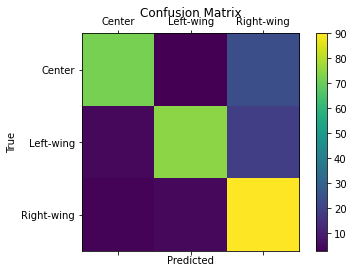

In [45]:
import matplotlib.pyplot as plt
labels = ["Center", "Left-wing", "Right-wing"]
cm = confusion_matrix(y_true, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Comparing Percentages of Keywords

In an attempt to understand why the classifier works so well on our right-wing news source, we will compare the percentage of **keywords** in the test set for each news source that was seen in the training set of that source. 

#### Training Datasets

We have to set the dictionaries back to zero to count the training datasets. 

In [46]:
reutersDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}
MSNBCDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}
foxNewsDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}

Next, we run the countKeywords function on the training sets and view the dictionaries.

In [47]:
countKeywords(reutersTrain, reutersDict)
countKeywords(msnbcTrain, MSNBCDict)
countKeywords(foxNewsTrain, foxNewsDict)

In [48]:
print(reutersDict)
print(MSNBCDict)
print(foxNewsDict)

{'economy': 19, 'healthcare': 2, 'supreme court': 18, 'coronavirus': 134, 'crime': 3, 'foreign policy': 0, 'guns': 2, 'race': 14, 'immigration': 0, 'inequality': 0, 'climate change': 6, 'abortion': 0, 'police': 29, 'government': 51, 'covid': 129, 'president': 93, 'congress': 4}
{'economy': 6, 'healthcare': 1, 'supreme court': 41, 'coronavirus': 112, 'crime': 0, 'foreign policy': 1, 'guns': 0, 'race': 13, 'immigration': 0, 'inequality': 1, 'climate change': 3, 'abortion': 0, 'police': 6, 'government': 3, 'covid': 108, 'president': 315, 'congress': 3}
{'economy': 6, 'healthcare': 1, 'supreme court': 78, 'coronavirus': 109, 'crime': 0, 'foreign policy': 2, 'guns': 0, 'race': 6, 'immigration': 1, 'inequality': 0, 'climate change': 0, 'abortion': 0, 'police': 27, 'government': 6, 'covid': 63, 'president': 407, 'congress': 10}


#### Testing Datasets

We have to set the dictionaries back to zero to count the testing datasets. 

In [122]:
reutersDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}
MSNBCDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}
foxNewsDict = {'economy' : 0,'healthcare' : 0, 'supreme court' : 0, 'coronavirus' : 0, 'crime' : 0, 'foreign policy' : 0, 'guns' : 0, 'race' : 0, 'immigration' : 0, 'inequality' : 0, 'climate change' : 0, 'abortion' : 0, 'police': 0, 'government': 0, 'covid': 0, 'president': 0, 'congress': 0}

Next, we run the countKeywords function on the testing sets and view the dictionaries

In [123]:
countKeywords(reutersTest, reutersDict)
countKeywords(msnbcTest, MSNBCDict)
countKeywords(foxNewsTest, foxNewsDict)

In [124]:
print(reutersDict)
print(MSNBCDict)
print(foxNewsDict)

{'economy': 2, 'healthcare': 2, 'supreme court': 1, 'coronavirus': 27, 'crime': 1, 'foreign policy': 0, 'guns': 0, 'race': 0, 'immigration': 0, 'inequality': 0, 'climate change': 1, 'abortion': 0, 'police': 6, 'government': 5, 'covid': 15, 'president': 3, 'congress': 3}
{'economy': 0, 'healthcare': 0, 'supreme court': 4, 'coronavirus': 7, 'crime': 0, 'foreign policy': 0, 'guns': 0, 'race': 0, 'immigration': 0, 'inequality': 1, 'climate change': 0, 'abortion': 0, 'police': 13, 'government': 2, 'covid': 6, 'president': 17, 'congress': 2}
{'economy': 0, 'healthcare': 0, 'supreme court': 0, 'coronavirus': 6, 'crime': 0, 'foreign policy': 0, 'guns': 0, 'race': 0, 'immigration': 0, 'inequality': 0, 'climate change': 0, 'abortion': 0, 'police': 15, 'government': 1, 'covid': 3, 'president': 19, 'congress': 1}


We exported all six of the dictionaries above to an Excel sheet for further analysis.

**After analysis, we decided to not use any of this information in our project. Since the classifier uses *all* words and not just our selected keywords, we decided it would be more effective to measure percantages of *all* words, which we did below**

### Comparing Percentages of *All Words*

In order to further analyze the accuracy of the classifier, we will look at the percentages of all words in the training data set vs. the testing data set. We use this exploration to answer the following question: 

### **What percentage of the words in the test data was seen in the training data?**

First, we will compare between all testing and all traiing data, and then we will split the data into the three appropriate news sources

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

We loop through the tuples to grab only the post texts, and not the partisanship, from each tuple, and add them to a new list

In [11]:
trainSentences = []
for tup in train:
    trainSentences.append(tup[0])

testSentences = []
for tup in test: 
    testSentences.append(tup[0])

We implement a training and a testing count vectorizer, and we fit the sentences

In [12]:
vectorizerTrain = CountVectorizer()
X_train = vectorizerTrain.fit_transform(trainSentences)
X_train

<2097x7916 sparse matrix of type '<class 'numpy.int64'>'
	with 57451 stored elements in Compressed Sparse Row format>

In [13]:
vectorizerTest = CountVectorizer()
X_test = vectorizerTest.fit_transform(testSentences)
X_test

<297x2347 sparse matrix of type '<class 'numpy.int64'>'
	with 7083 stored elements in Compressed Sparse Row format>

We use .get_feature_names() to parse through the vectorizer and create a list of all of the unique words within a list of sentences. We use this extension in addition to a counter to loop through the test and train unique features and figure out how many unique words in the test data set are in the training data set. Lastly, we divide the number of unique words in the training and testing set by the number of the words in the testing set, to get the percentage we are looking for. 

In [21]:
counter = 0
for word in vectorizerTest.get_feature_names(): 
    if word in vectorizerTrain.get_feature_names():
        counter += 1
print(counter)
print(len(vectorizerTest.get_feature_names()))

1664
2347


### (1664/2347) * 100 = 70.9%

We run this code again on the testing and training sets from Reuters, MSNBC, and Fox News. 
We loop through the tuples to grab only the post texts, and not the partisanship, from each tuple, and add them to a new list

In [14]:
reutersTrainSentences = []
for tup in reutersTrain:
    reutersTrainSentences.append(tup[0])

reutersTestSentences = []
for tup in test: 
    reutersTestSentences.append(tup[0])
    
msnbcTrainSentences = []
for tup in msnbcTrain:
    msnbcTrainSentences.append(tup[0])

msnbcTestSentences = []
for tup in test: 
    msnbcTestSentences.append(tup[0])

foxNewsTrainSentences = []
for tup in foxNewsTrain:
    foxNewsTrainSentences.append(tup[0])

foxNewsTestSentences = []
for tup in test: 
    foxNewsTestSentences.append(tup[0])

We implement a training and a testing count vectorizer, and we fit the sentences

In [18]:
reutersVectorizerTrain = CountVectorizer()
X_train = reutersVectorizerTrain.fit_transform(reutersTrainSentences)

reutersVectorizerTest = CountVectorizer()
X_test = reutersVectorizerTest.fit_transform(reutersTestSentences)

msnbcVectorizerTrain = CountVectorizer()
X_train = msnbcVectorizerTrain.fit_transform(msnbcTrainSentences)

msnbcVectorizerTest = CountVectorizer()
X_test = msnbcVectorizerTest.fit_transform(msnbcTestSentences)

foxNewsVectorizerTrain = CountVectorizer()
X_train = foxNewsVectorizerTrain.fit_transform(foxNewsTrainSentences)

foxNewsVectorizerTest = CountVectorizer()
X_test = foxNewsVectorizerTest.fit_transform(foxNewsTestSentences)

We use .get_feature_names() to parse through the vectorizer and create a list of all of the unique words within a list of sentences. We use this extension in addition to a counter to loop through the test and train unique features and figure out how many unique words in the test data set are in the training data set. Lastly, we divide the number of unique words in the training and testing set by the number of the words in the testing set, to get the percentage we are looking for. 

#### Reuters

In [22]:
counter = 0
for word in reutersVectorizerTest.get_feature_names(): 
    if word in reutersVectorizerTrain.get_feature_names():
        counter += 1
print(counter)
print(len(reutersVectorizerTest.get_feature_names()))

1274
2347


### (1274/2347) * 100 = 54.3%

#### MSNBC

In [23]:
counter = 0
for word in msnbcVectorizerTest.get_feature_names(): 
    if word in msnbcVectorizerTrain.get_feature_names():
        counter += 1
print(counter)
print(len(msnbcVectorizerTest.get_feature_names()))

1144
2347


### (1144/2347) * 100 = 48.7%

#### Fox News

In [24]:
counter = 0
for word in foxNewsVectorizerTest.get_feature_names(): 
    if word in foxNewsVectorizerTrain.get_feature_names():
        counter += 1
print(counter)
print(len(foxNewsVectorizerTest.get_feature_names()))

1164
2347


### (1164/2347) * 100 = 49.6%

We will record these results to analyze in our results. 

### Testing our Classifier on Additional News Sources

In order to see how accurate our classifier would be on news sources that are not the three we trained it on, we chose 6 more news sources to run our classifier on. We chose two historically neutral sources, AP and Bloomberg, two left-wing, Wonkette, CNN, and two right-wing, InfoWars, The Washington Times. *Both InfoWars and Wonkette are historically less reliable and contain propagated information, so we decided to include these sources to analyze what happens.* We made these selections using an Interactive Bias Media Chart (https://www.adfontesmedia.com/interactive-media-bias-chart-2/) that we referred to when choosing our intial three sources as well as during our Literature Review

We decided to scrape 200 of the most recent posts from all six of our news sources and run them through the classifier to test to accuracy. Since our classifier was trained to work for any post, time does not need to be controlled in this step. 

First, we load in the appropriate json files. 

**In order to replicate our process on a personal computer, the file path for *all* JSON loads may need to be altered. For easiest access, move the 'PM6_MarisaPapagelis_NatalieReid' folder, containing all of our work, to your desktop, and the given file paths should work**

In [49]:
with open ('JSON files/AP-posts.json','r') as infile:
    AP = json.load(infile)

In [50]:
with open ('JSON files/Bloomberg-posts.json','r') as infile:
    Bloomberg = json.load(infile)

In [51]:
with open ('JSON files/Wonkette-posts.json','r') as infile:
    Wonkette = json.load(infile)

In [52]:
with open ('JSON files/CNN-posts.json','r') as infile:
    CNN = json.load(infile)

In [53]:
with open ('JSON files/DailyCaller-posts.json','r') as infile:
    DailyCaller = json.load(infile)

In [54]:
with open ('JSON files/WashTimes-posts.json','r') as infile:
    WashTimes = json.load(infile)

We subset the files to hold only the first 200 posts for each selected news source. 

In [55]:
AP = AP[0:199]
Bloomberg = Bloomberg[0:199]
Wonkette = Wonkette[0:199]
CNN = CNN[0:199]
DailyCaller = DailyCaller[0:199]
WashTimes = WashTimes[0:199]

Now we'll create the testing data set from the scraped posts of the other six news pages. Again, we'll use the generic labels of "left", "center", and "right" because we're specifically looking at partisanship. The first 200 posts from each of these JSON files are already subsetted above.

In [56]:
test2 = []

for post in AP:
    test2.append((post[0], "Center"))

for post in Bloomberg:
    test2.append((post[0], "Center"))
    
for post in Wonkette:
    test2.append((post[0], "Left-wing"))

for post in CNN: 
    test2.append((post[0], "Left-wing"))
    
for post in DailyCaller:
    test2.append((post[0], "Right-wing"))
    
for post in WashTimes:
    test2.append((post[0], "Right-wing"))

The entire testing data set can be viewed by uncommenting and running the cell below.

In [134]:
#print(test2)

Finally, we'll test our new classifier on the additional scraped posts.

In [57]:
cl.accuracy(test2)

0.4380234505862647

*We commented the section below for simplicity because it is quite lengthy. Uncomment the cell to view the results including the prediciton, the truth, and the sentence.*

In [137]:
# print("Predict | True | Sentence")
# for sentence in test2:
#     print(cl.classify(sentence[0]) + " | "  + sentence[1] + " | " + sentence[0])

As we can see, the accuracy for this classifier is much lower at just under 42%. While this is still slightly above chance (33%), it doesn't inspire much confidence that our classifier is actually picking up on partisanship instead of linguistic intricacies. To look into this issue further, we will test each of the new test data sets on the trained classifier, in order to see which ones are more accurate.

In [58]:
# create test data sets for each individual news source

APTest = []
for post in AP:
    APTest.append((post[0], "Center"))
    
BloombergTest = []
for post in Bloomberg:
    BloombergTest.append((post[0], "Center"))
    
WonketteTest = []
for post in Wonkette:
    WonketteTest.append((post[0], "Left-wing"))
    
CNNTest = []
for post in CNN:
    CNNTest.append((post[0], "Left-wing"))
    
DailyCallerTest = []
for post in DailyCaller:
    DailyCallerTest.append((post[0], "Right-wing"))
    
WashTimesTest = []
for post in WashTimes:
    WashTimesTest.append((post[0], "Right-wing"))

Below are each of the new data sets being run individually in the classifier. They are broken up in this way because each takes a while to run.

In [59]:
cl.accuracy(APTest)

0.3316582914572864

In [60]:
cl.accuracy(BloombergTest)

0.32663316582914576

In [61]:
cl.accuracy(WonketteTest)

0.6180904522613065

In [62]:
cl.accuracy(CNNTest)

0.41708542713567837

In [63]:
cl.accuracy(DailyCallerTest)

0.5477386934673367

In [64]:
cl.accuracy(WashTimesTest)

0.3869346733668342

These results are really interesting. The accuracy scores have a lot of variation, and it looks as though the two news pages for which our classifier could accurately predict partisanship were Wonkette and The Daily Caller. These two pages were chosen because they both are classified as hyper-partisan and as sharing misleading or false information according to the Ad Fontes media bias chart mentioned earlier. Overall, the classifier did a better job of accurately labeling left-wing news sources, suggesting that these pages have a more prominent linguistic style that is specific to them. None of these accuracy scores are very high  or inspire a lot of confindence (except for those for Wonkette and The Daily Caller), which could indicate that our classifier is using attributes such as post length and word frequency in order to make its predictions, instead of semantic partisanship.